In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

In [82]:
class cc:
    def __init__ (self,path):
        self.df = pd.read_csv(path)
    
    def drop_column(self,data):
        self.df.drop(data, inplace=True, axis=1)

    def vis_distrubution(self,data:pd.DataFrame):
        data.hist(bins=17, figsize=(20, 20), layout=(5, 4));      
           
    def params(self,eps,min_samples):
        self.eps = eps
        self.min_samples = min_samples
    
    def dimension_reduction(self,data):
        self.pca = PCA(0.90)
        self.pca_data = self.pca.fit_transform(data)
    
    def kmeans_optimize(self,data,k_max):
        wss = []
        silhouette = []
        for k in range(2,k_max):
            kmeans = KMeans(n_clusters=k)
            kmeans.fit(data)
            silhouette_score_ = silhouette_score(data,kmeans.labels_)
            wss.append(kmeans.inertia_)
            silhouette.append(silhouette_score_)
        
        plt.plot(1 + np.arange(len(wss)),wss,"bo-")
        plt.title("elbow method")
        plt.show()
        plt.plot(range(2,11),silhouette,"bo-")
        plt.title("silhoutte method")
        plt.show()
    
    def run_kmeans(self,n_clusters_,data):
        self.kmeans = KMeans(n_clusters_,random_state=123)
        self.pred_labels =  self.kmeans.fit_predict(data)
        self.centroids = self.kmeans.cluster_centers_

In [83]:
cluster = cc("CC GENERAL.csv")

In [84]:
cluster.df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [85]:
## Droppa columnen Cust_id , varje rad består av 1 kund. Så den kan droppas
cluster.drop_column("CUST_ID")

In [86]:
cluster.df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [87]:
## kolla Na värden
cluster.df.isna().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CASH_ADVANCE_FREQUENCY                0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
TENURE                                0
dtype: int64

In [88]:
## kolla kolumnen Minimum_payments och credit_limit
## fyll na värden i kolumnen minimum payments och credit limit med mean.
print(cluster.df[["MINIMUM_PAYMENTS","CREDIT_LIMIT"]].describe())
print(cluster.df[["MINIMUM_PAYMENTS","CREDIT_LIMIT"]])


       MINIMUM_PAYMENTS  CREDIT_LIMIT
count       8637.000000   8949.000000
mean         864.206542   4494.449450
std         2372.446607   3638.815725
min            0.019163     50.000000
25%          169.123707   1600.000000
50%          312.343947   3000.000000
75%          825.485459   6500.000000
max        76406.207520  30000.000000
      MINIMUM_PAYMENTS  CREDIT_LIMIT
0           139.509787        1000.0
1          1072.340217        7000.0
2           627.284787        7500.0
3                  NaN        7500.0
4           244.791237        1200.0
...                ...           ...
8945         48.886365        1000.0
8946               NaN        1000.0
8947         82.418369        1000.0
8948         55.755628         500.0
8949         88.288956        1200.0

[8950 rows x 2 columns]


In [89]:
cluster.df.fillna(cluster.df[["MINIMUM_PAYMENTS","CREDIT_LIMIT"]].mean(),inplace=True)

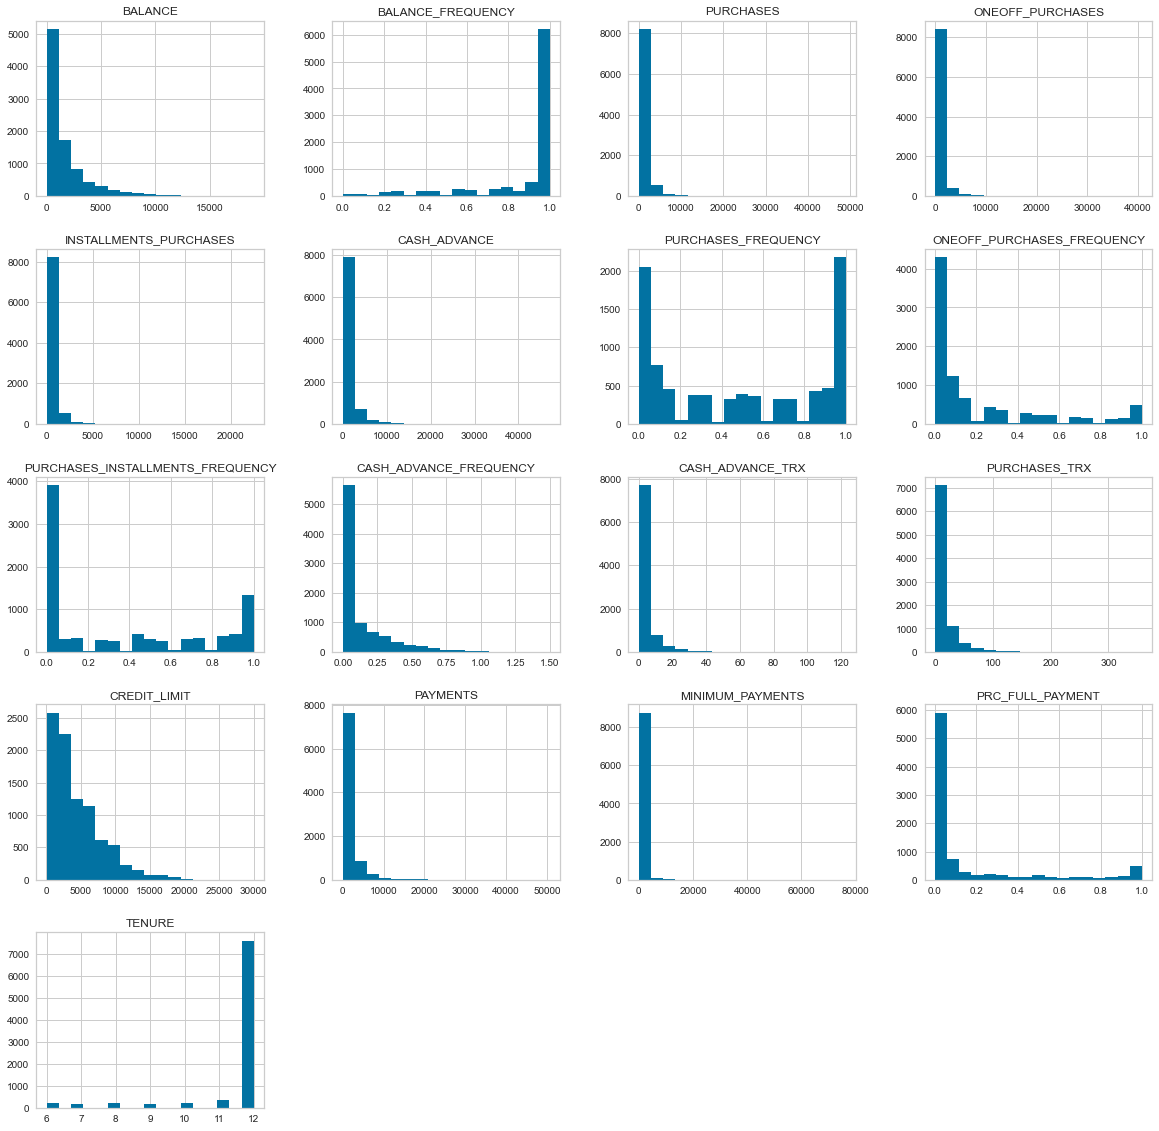

In [567]:
## Plotta för att se distrubition på alla variabler
## väldigt många variabler är postiv skewed
cluster.vis_distrubution(cluster.df)

<AxesSubplot:>

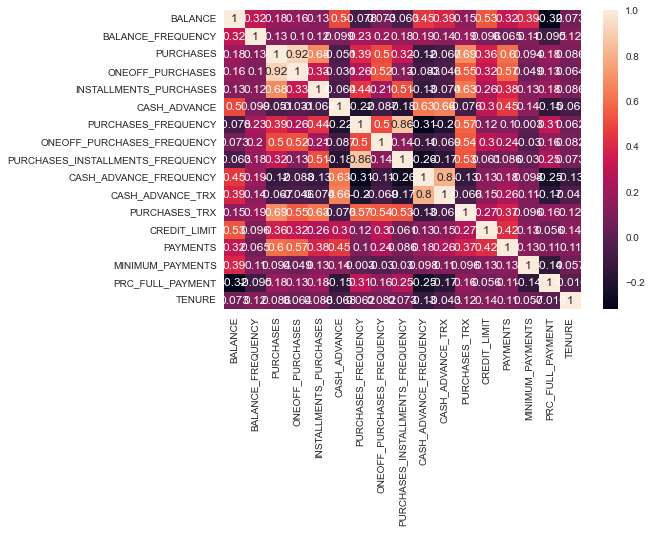

In [91]:
sns.heatmap(cluster.df.corr(),annot=True)

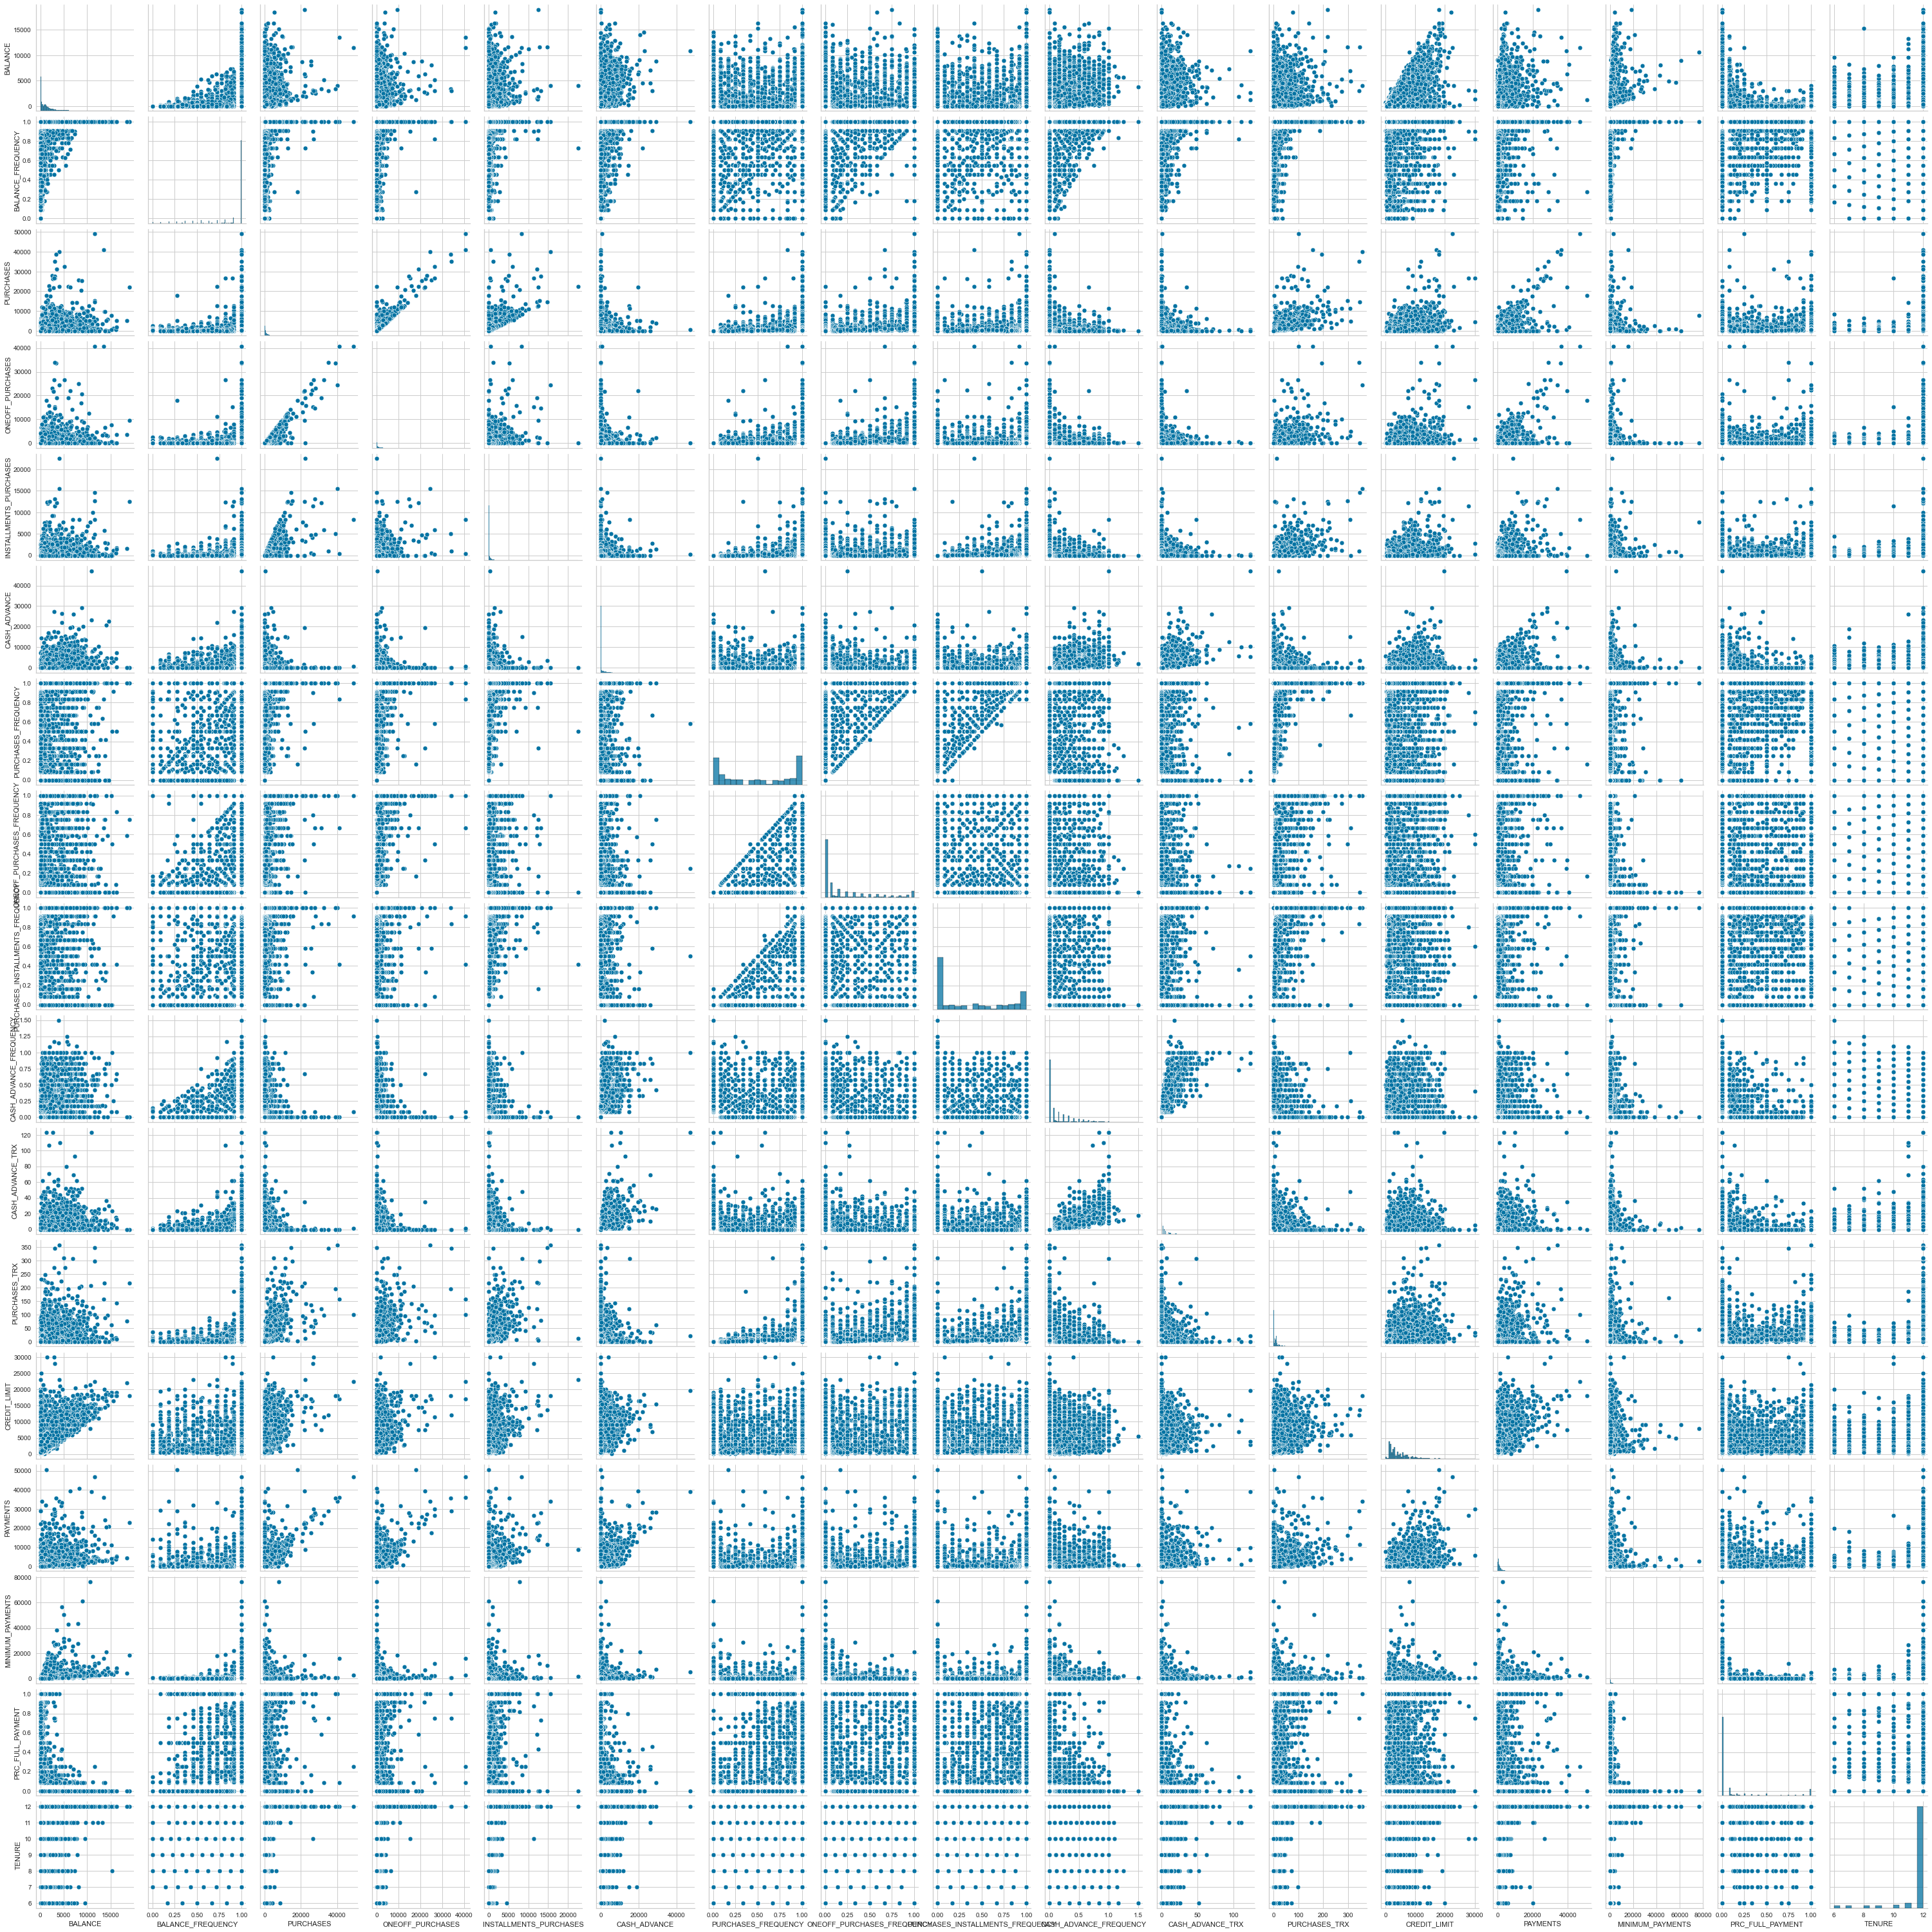

In [92]:
sns.pairplot(cluster.df)


In [93]:
## skala datan
std_scaler = StandardScaler()
X = pd.DataFrame(std_scaler.fit_transform(cluster.df),columns=cluster.df.columns)

## KMEANS UTAN DIMENSIONSREDUCERING

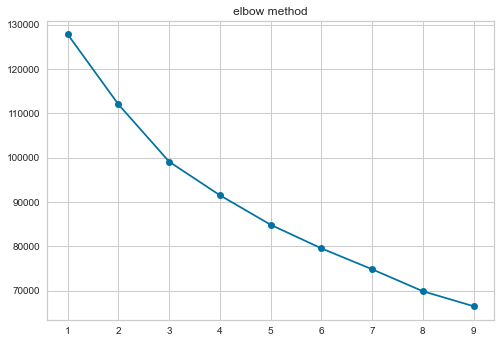

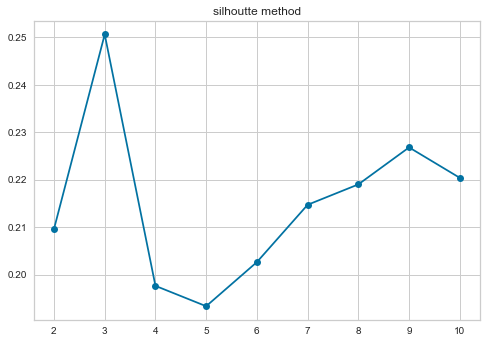

In [94]:
## kolla efter bästa K-kluster med hjälp av elbow och silhoutte metrics
cluster.kmeans_optimize(X,11)

In [100]:
cluster.run_kmeans(3,X)

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_23316\2709225409.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(4))


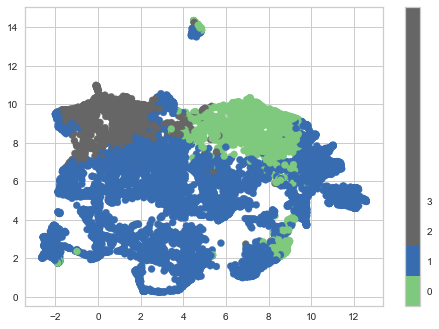

In [101]:
umap = UMAP(random_state=0)
projections = umap.fit_transform(X)

plt.scatter(projections[:,0], projections[:,1],c=cluster.pred_labels,cmap="Accent")
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(4))
plt.show()

In [102]:
cluster.df["LABELS"] = cluster.pred_labels
cluster.df.groupby("LABELS").mean()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
LABELS                                                                  
0       3989.326804           0.957980   384.528277        248.718133   
1        799.702576           0.835188   505.532394        253.120131   
2       2220.003291           0.981477  4268.520980       2717.828543   

        INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
LABELS                                                              
0                   135.887632   3869.856855             0.232290   
1                   252.733061    329.866776             0.465072   
2                  1551.178267    458.421147             0.949093   

        ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
LABELS                                                                 
0                         0.110942                          0.144242   
1                         0.132333                          0.345145   
2                         0.668166                          0.744584   

        CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
LABELS                                                                          
0                     0.447176         12.390351       5.612155   6682.960242   
1                     0.068316          1.211636       8.653865   3269.793763   
2                     0.063014          1.528745      56.472065   7733.967611   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  
LABELS                                                              
0       3018.907202       1795.687341          0.033774  11.350877  
1        909.729614        548.525315          0.155750  11.478836  
2       4151.276172       1224.538588          0.298632  11.923077

* grupp 0 : "Högt Saldo Lågt inköp"
* grupp 1 : "Lågt Saldo Medel inköp"
* grupp 2 : "Medium saldo Högt Inköp"

In [103]:

cluster.df["LABELS"].replace({0:"Högt Saldo Lågt inköp", 1 : "Lågt Saldo Medium Inköp",2 : "Medium saldo Högt Inköp"},inplace=True)

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='BALANCE'>

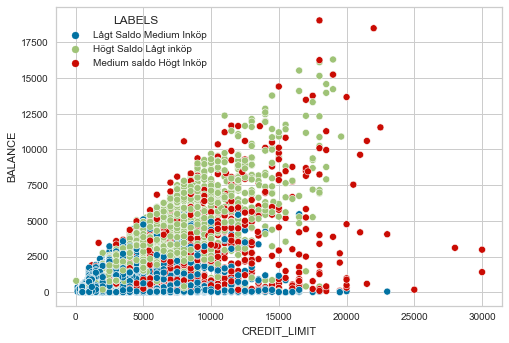

In [104]:
sns.scatterplot(data=cluster.df,x=cluster.df["CREDIT_LIMIT"],y=cluster.df["BALANCE"],hue="LABELS")

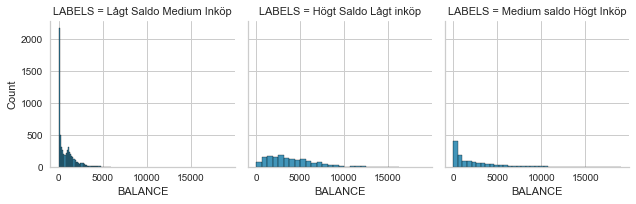

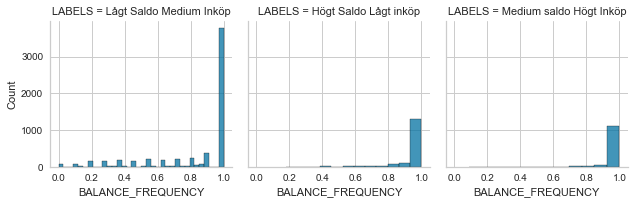

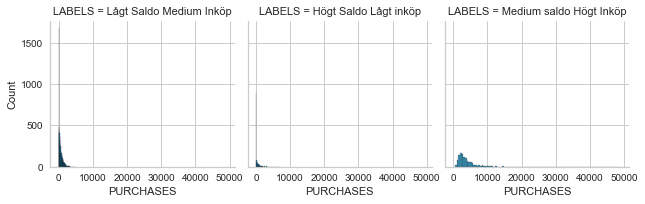

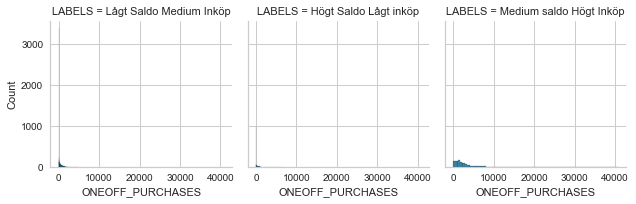

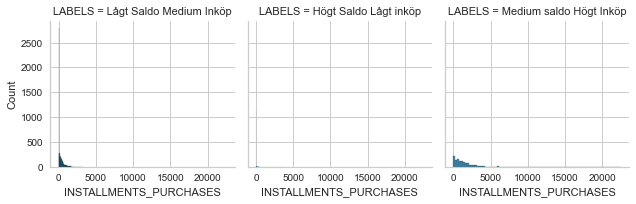

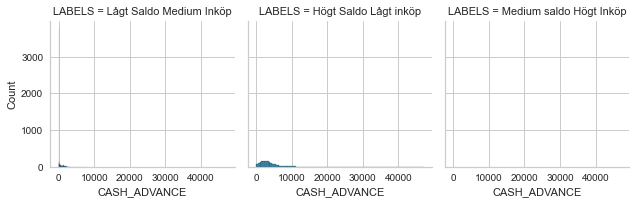

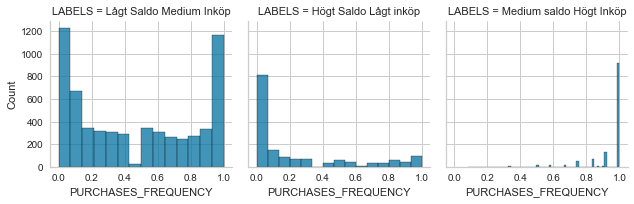

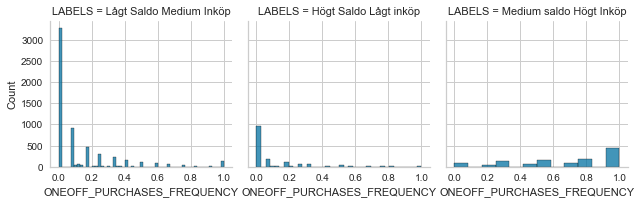

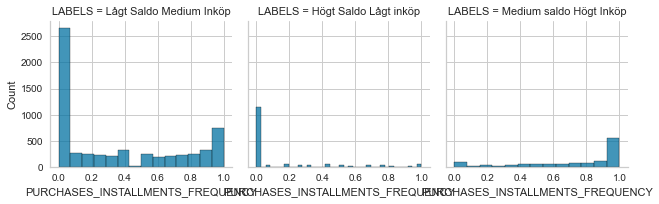

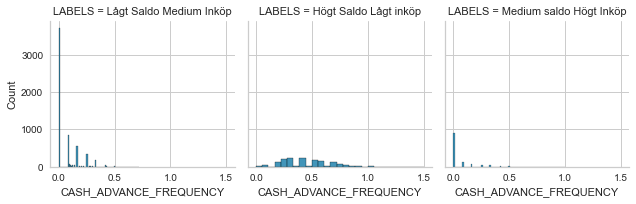

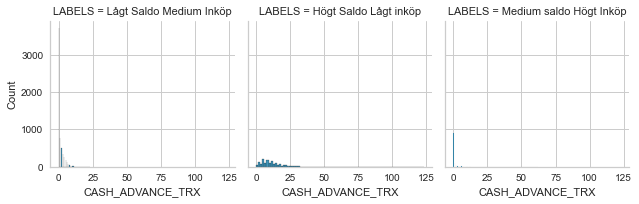

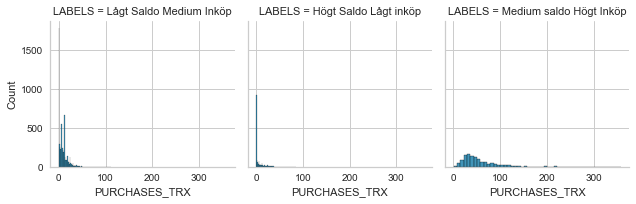

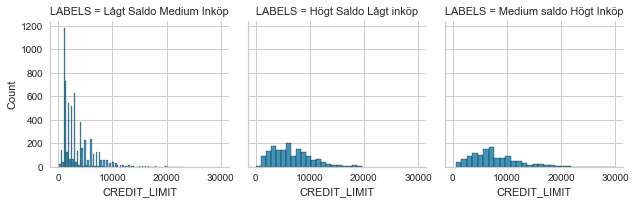

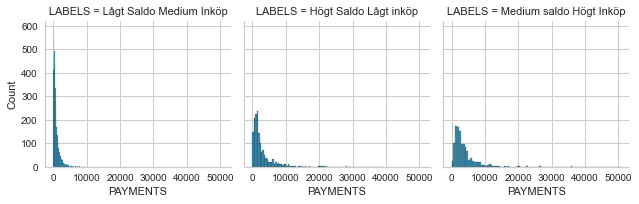

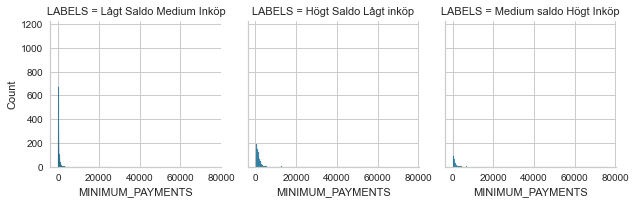

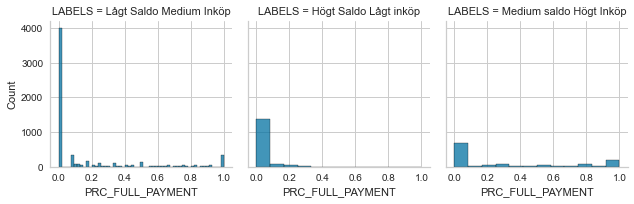

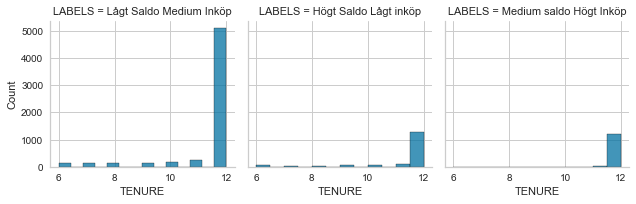

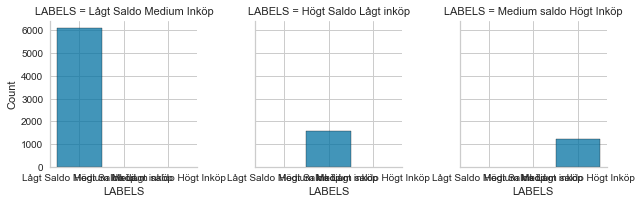

In [29]:
## Kolla distrubioner för de olika clustringarna
for i in cluster.df:
   g = sns.FacetGrid(cluster.df, col="LABELS")
   g.map(sns.histplot,i)

## KMEANS MED DIMENSIONSREDUCERING

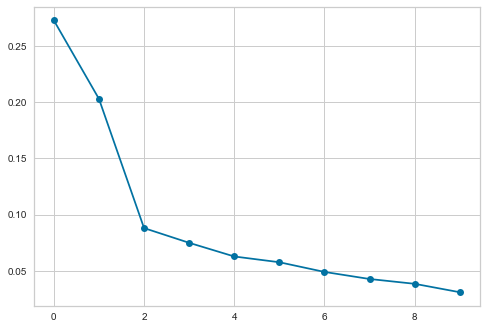

In [106]:
cluster.dimension_reduction(X)
plt.plot(cluster.pca.explained_variance_ratio_,"bo-")

In [107]:
data_pca = pd.DataFrame(cluster.pca_data)
data_pca.head()

0         1         2         3         4         5         6  \
0 -1.682220 -1.076451  0.488507  0.665552  0.018225  0.050629  0.829144   
1 -1.138295  2.506477  0.601212 -0.120437  0.605803 -1.136841 -0.374507   
2  0.969684 -0.383520  0.102371  1.209266 -2.172584 -0.217222 -1.573258   
3 -0.873628  0.043166  1.460167  1.151980  0.295632 -0.123689 -0.280759   
4 -1.599434 -0.688581  0.365094  0.990232 -0.487039  0.075060  0.707923   

          7         8         9  
0 -0.039303  0.115340 -0.077774  
1  0.132411  0.687878 -0.777671  
2 -0.169548 -0.883727 -0.001939  
3 -0.559099 -0.146564  0.393144  
4  0.208399  0.584619 -0.121734

In [108]:
data_pca = data_pca.add_prefix("component_")

In [109]:
data_pca["LABELS"] = pd.DataFrame(cluster.pred_labels)
data_pca.head()


component_0  component_1  component_2  component_3  component_4  \
0    -1.682220    -1.076451     0.488507     0.665552     0.018225   
1    -1.138295     2.506477     0.601212    -0.120437     0.605803   
2     0.969684    -0.383520     0.102371     1.209266    -2.172584   
3    -0.873628     0.043166     1.460167     1.151980     0.295632   
4    -1.599434    -0.688581     0.365094     0.990232    -0.487039   

   component_5  component_6  component_7  component_8  component_9  LABELS  
0     0.050629     0.829144    -0.039303     0.115340    -0.077774       1  
1    -1.136841    -0.374507     0.132411     0.687878    -0.777671       0  
2    -0.217222    -1.573258    -0.169548    -0.883727    -0.001939       1  
3    -0.123689    -0.280759    -0.559099    -0.146564     0.393144       1  
4     0.075060     0.707923     0.208399     0.584619    -0.121734       1

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_23316\138902361.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(3))


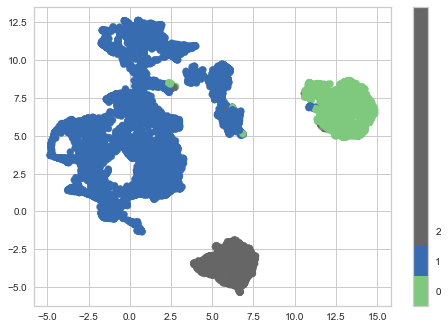

In [110]:
umap = UMAP(random_state=0)
projections = umap.fit_transform(data_pca)

plt.scatter(projections[:,0], projections[:,1],c=cluster.pred_labels,cmap="Accent")
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(3))
plt.show()

In [111]:
data_pca["LABELS"].replace({0:"Högt Saldo Lågt inköp", 1 : "Lågt Saldo Medium Inköp",2 : "Medium saldo Högt Inköp"},inplace=True)
data_pca.head()

component_0  component_1  component_2  component_3  component_4  \
0    -1.682220    -1.076451     0.488507     0.665552     0.018225   
1    -1.138295     2.506477     0.601212    -0.120437     0.605803   
2     0.969684    -0.383520     0.102371     1.209266    -2.172584   
3    -0.873628     0.043166     1.460167     1.151980     0.295632   
4    -1.599434    -0.688581     0.365094     0.990232    -0.487039   

   component_5  component_6  component_7  component_8  component_9  \
0     0.050629     0.829144    -0.039303     0.115340    -0.077774   
1    -1.136841    -0.374507     0.132411     0.687878    -0.777671   
2    -0.217222    -1.573258    -0.169548    -0.883727    -0.001939   
3    -0.123689    -0.280759    -0.559099    -0.146564     0.393144   
4     0.075060     0.707923     0.208399     0.584619    -0.121734   

                    LABELS  
0  Lågt Saldo Medium Inköp  
1    Högt Saldo Lågt inköp  
2  Lågt Saldo Medium Inköp  
3  Lågt Saldo Medium Inköp  
4  Lågt Saldo Medium Inköp

C:\Users\Gabriel\miniconda3\envs\vis_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='component_0', ylabel='component_1'>

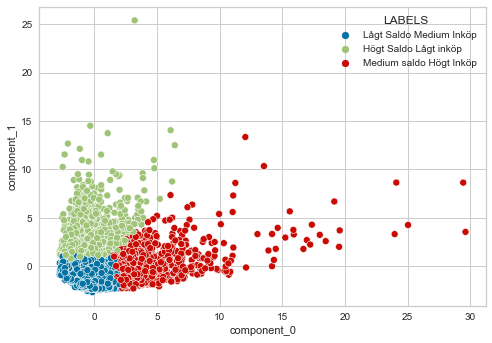

In [112]:
sns.scatterplot(data_pca.iloc[:,0],data_pca.iloc[:,1],hue=data_pca["LABELS"])